### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [17]:
#PART A: Data Wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#1
academic = pd.read_csv('student_academic.csv')
activities = pd.read_csv('student_activities.csv')
print(academic.shape)
print(academic.dtypes)
print(activities.shape)
print(activities.dtypes)

#2
academic = academic.dropna()
activities = activities.dropna()
#i dropped the rows with missing data because such a small amount had missing values that it wont effect the data


#3
academic["GPA_change"] = academic["GPA_Sem2"] - academic["GPA_Sem1"]
academic["StudyIntensity"] = academic["Hours_Study"] / academic["Credits_Enrolled"]
academic["AttendanceFlag"] = academic["AttendanceRate"] >= 0.90
academic["AttendanceFlag"] = academic["AttendanceFlag"].apply(lambda x: 1 if x else 0)

academic.head()

(250, 9)
StudentID             int64
Major                object
ClassYear            object
GPA_Sem1            float64
GPA_Sem2            float64
Credits_Enrolled      int64
Hours_Study         float64
AttendanceRate      float64
Scholarship          object
dtype: object
(364, 4)
StudentID          int64
Activity          object
HoursPerWeek       int64
LeadershipRole    object
dtype: object


,StudentID,Major,ClassYear,GPA_Sem1,GPA_Sem2,Credits_Enrolled,Hours_Study,AttendanceRate,Scholarship,GPA_change,StudyIntensity,AttendanceFlag
0,1001,Psychology,Freshman,3.86,3.68,14,12.0,0.98,No,-0.18,0.857143,1
1,1002,English,Senior,3.01,3.29,13,24.0,0.76,No,0.28,1.846154,0
2,1003,Economics,Senior,3.23,3.23,15,33.0,0.89,No,0.00,2.200000,0
3,1004,English,Sophomore,2.96,2.85,16,14.0,0.93,Yes,-0.11,0.875000,1
4,1005,English,Senior,2.93,2.92,12,38.0,0.97,Yes,-0.01,3.166667,1


---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

     StudentID  GPA_change
99        1072        1.45
100       1072        1.45
101       1072        1.45
292       1203        1.42
290       1203        1.42
291       1203        1.42
130       1093        1.38
131       1093        1.38
132       1093        1.38
294       1205        1.37


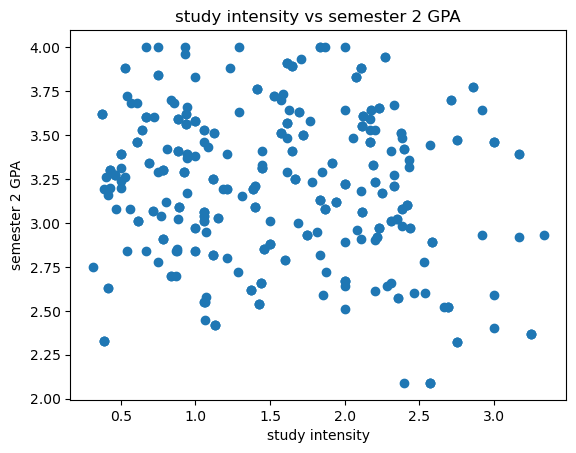

pearson correlation: -0.13
mean: Scholarship
No     3.166636
Yes    3.265385
Name: GPA_Sem2, dtype: float64

std: Scholarship
No     0.444626
Yes    0.391508
Name: GPA_Sem2, dtype: float64


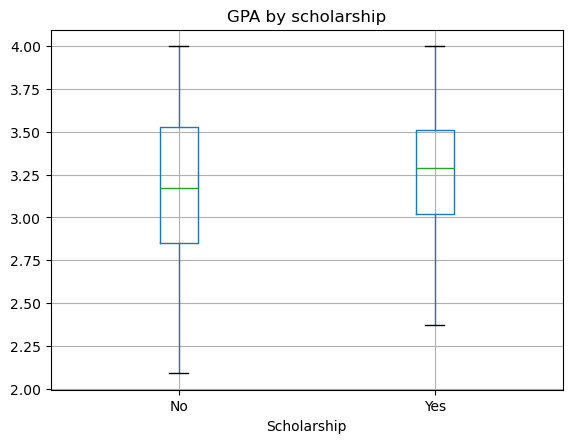

GPA by AttendanceFlag
0    3.251872
1    3.146369
Name: GPA_Sem2, dtype: float64


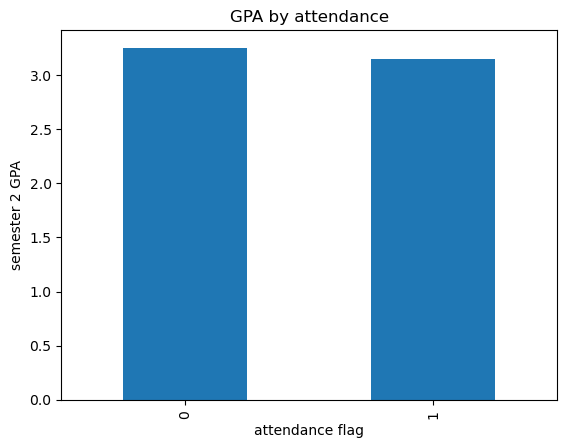

In [87]:
#PART 2
# You can break this cell up if you prefer.
merged = pd.merge(academic, activities, on="StudentID", how="left")

#b1 
sorted_gpachange = merged.sort_values("GPA_change", ascending=False)
top10 = sorted_gpachange[["StudentID", "GPA_change"]].head(10)
print(top10)

#b2
plt.scatter(merged["StudyIntensity"], merged["GPA_Sem2"])
plt.title("study intensity vs semester 2 GPA")
plt.xlabel("study intensity")
plt.ylabel("semester 2 GPA")
plt.show()
r = np.corrcoef(merged["StudyIntensity"], merged["GPA_Sem2"])[0, 1]
print("pearson correlation:", r.round(2))

#b3
gpamean = merged.groupby("Scholarship")["GPA_Sem2"].mean()
gpastd = merged.groupby("Scholarship")["GPA_Sem2"].std()
print("mean:", gpamean)
print()
print("std:", gpastd)
merged.boxplot(column="GPA_Sem2", by="Scholarship")
plt.title("GPA by scholarship")
plt.suptitle("")
plt.show()

#b4
attendmean = merged.groupby("AttendanceFlag")["GPA_Sem2"].mean()
print("GPA by", attendmean)

attendmean.plot(kind="bar")
plt.title("GPA by attendance")
plt.xlabel("attendance flag")
plt.ylabel("semester 2 GPA")
plt.show()


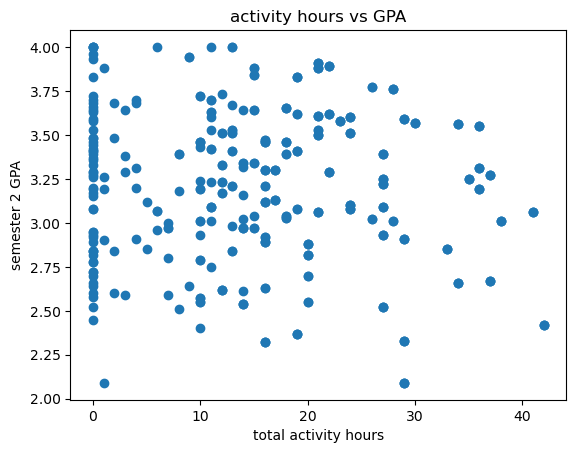

leadership GPA means: AnyLeadership
0    3.208909
1    3.196000
Name: GPA_Sem2, dtype: float64

leadership GPA std: AnyLeadership
0    0.431701
1    0.411623
Name: GPA_Sem2, dtype: float64


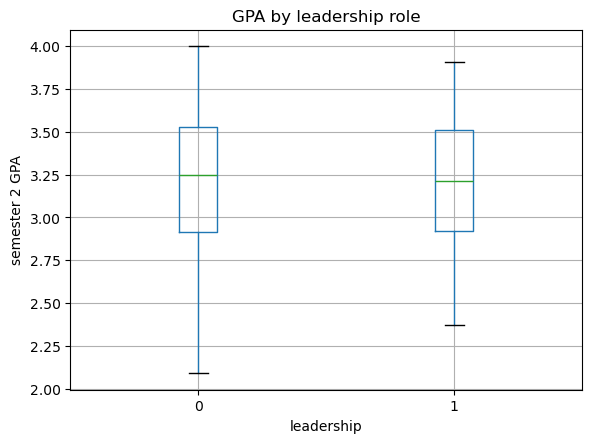

                   MeanGPA  MeanStudyIntensity  ScholarshipRate
Major                                                          
Biology           3.249833            1.715439        38.333333
Computer Science  3.245750            1.585857        47.500000
Economics         3.164819            1.424459        31.325301
English           3.204808            1.514242        26.923077
Psychology        3.178000            1.566434        49.411765


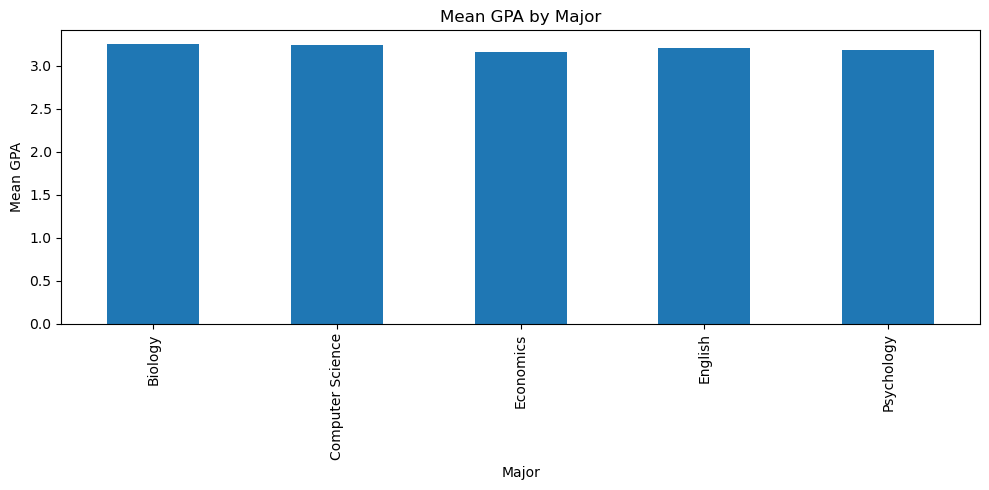

Top 15 Students by Success Score:
     StudentID  SuccessScore
44        1034      3.801000
45        1034      3.801000
46        1034      3.801000
180       1127      3.728752
179       1127      3.728752
178       1127      3.728752
133       1095      3.480315
60        1042      3.472661
59        1042      3.472661
203       1144      3.453714
202       1144      3.453714
201       1144      3.453714
250       1180      3.297815
90        1067      3.277441
15        1011      3.141832


In [129]:
#b5
activity_totals = merged.groupby("StudentID")["HoursPerWeek"].sum()
merged["TotalActivityHours"] = merged["StudentID"].map(activity_totals)
#had to look up the .map function to help the previous group.by and make the code wayyy simpler
merged["TotalActivityHours"] = merged["TotalActivityHours"].fillna(0)

plt.scatter(merged["TotalActivityHours"], merged["GPA_Sem2"])
plt.title("activity hours vs GPA")
plt.xlabel("total activity hours")
plt.ylabel("semester 2 GPA")
plt.show()

#b6
merged["AnyLeadership"] = np.where(merged["LeadershipRole"] == "Yes", 1, 0)
meanleadership = merged.groupby("AnyLeadership")["GPA_Sem2"].mean()
stdleadership = merged.groupby("AnyLeadership")["GPA_Sem2"].std()

print("leadership GPA means:", meanleadership)
print()
print("leadership GPA std:", stdleadership)

merged.boxplot(column="GPA_Sem2", by="AnyLeadership")
plt.title("GPA by leadership role")
plt.suptitle("")
plt.xlabel("leadership")
plt.ylabel("semester 2 GPA")
plt.show()


#b7
majorstats = merged.groupby("Major").agg(
    MeanGPA=("GPA_Sem2", "mean"),
    MeanStudyIntensity=("StudyIntensity", "mean"),
    ScholarshipRate=("Scholarship", lambda x: (x == "Yes").mean() * 100)
)

print(majorstats)


majorstats["MeanGPA"].plot(kind="bar", figsize=(10,5))
plt.title("Mean GPA by Major")
plt.xlabel("Major")
plt.ylabel("Mean GPA")
plt.tight_layout()
plt.show()

#b8
merged["zGPA"] = (merged["GPA_Sem2"] - merged["GPA_Sem2"].mean()) / merged["GPA_Sem2"].std()
merged["zAttendance"] = (merged["AttendanceRate"] - merged["AttendanceRate"].mean()) / merged["AttendanceRate"].std()
merged["zStudy"] = (merged["Hours_Study"] - merged["Hours_Study"].mean()) / merged["Hours_Study"].std()
merged["SuccessScore"] = merged["zGPA"] + merged["zAttendance"] + merged["zStudy"]

top_success = merged[["StudentID", "SuccessScore"]].sort_values("SuccessScore", ascending=False).head(15)
print("Top 15 Students by Success Score:")
print(top_success)

---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 


**Insight 1: Scholarship recipients consistently outperform their peers academically.**  
ASemester 2 GPA by scholarship status shows that students who received scholarships had a higher mean GPA (3.27) compared to those who did not receive scholarships (3.17). This finding was further supported by a lower standard deviation value, indicating more consistent performance among scholarship recipients  This insight reinforces the validity of existing scholarship selection criteria. Students who are awarded scholarships are not only strong candidates but continue to excel after receiving financial support. Institutions could use this finding to advocate for more targeted financial aid as a tool for academic success and retention.

**Insight 2: Higher study intensity does not translate to higher GPA.**  
Surprisingly, the correlation between study intensity (defined as hours of study per credit enrolled) and Semester 2 GPA is negative, with a Pearson coefficient of -0.13. This goes against typical assumptions that more studying leads to better academic performance. One interpretation is that students who are struggling might feel compelled to study more, but inefficiently. Alternatively, high study hours might reflect poor time management or burnout. This suggests a shift from recommending higher study time to improving study quality and effectiveness, such as through time management coaching, study groups, or tutoring resources.

**Most influential variables:**  
Among all variables the most powerful predictors of GPA were **Scholarship status** and **AttendanceFlag**. GPA differed meaningfully between students who met this threshold and those who didn’t, highlighting attendance as an important metric. Additionally, the  **SuccessScore** proved valuable for ranking high-performing students. This metric could be used to identify peer mentors, award candidates, or students suitable for honors programs.
